# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [41]:
df = pd.read_csv('data/previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [42]:
df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

In [46]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  mau                    15000 non-null  bool   
 13  renda                  15000 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(6)
memory usa

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

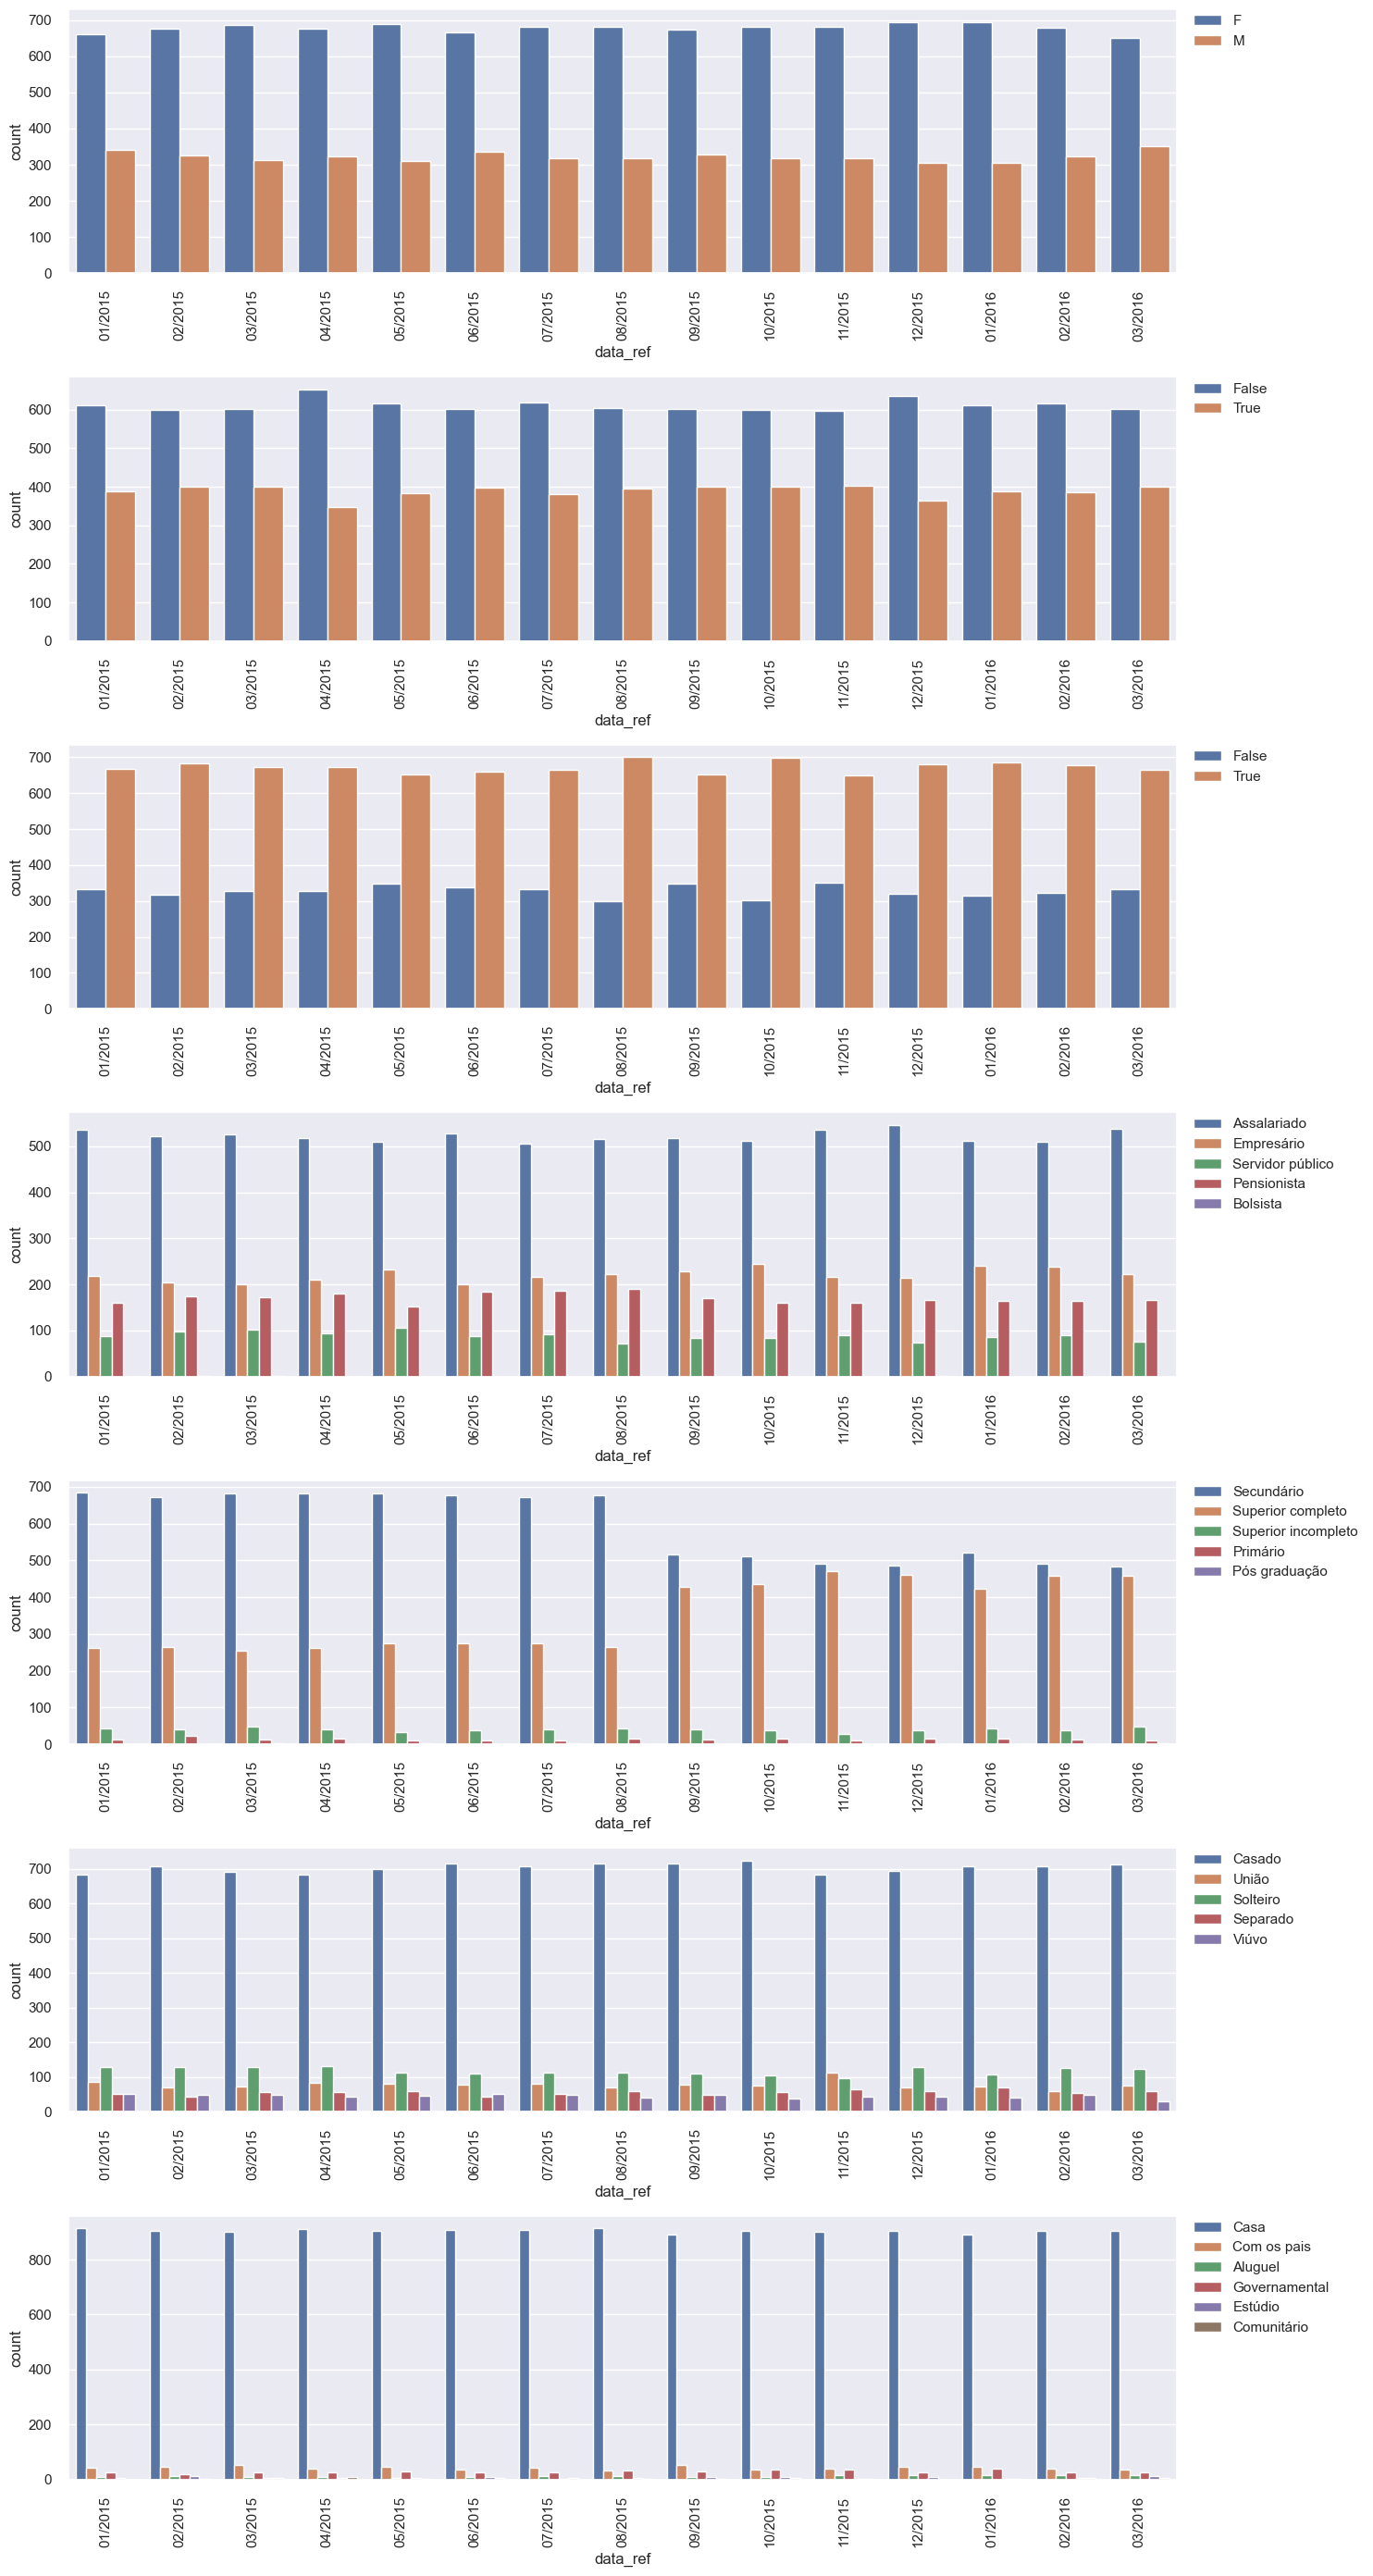

In [72]:
list_var = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

fig, ax = plt.subplots(len(list_var), 1, figsize=(15,4*len(list_var)))
tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m/%Y")).unique()

for i, var in enumerate(list_var):
    axg = ax[i]

    #plot Graph
    sns.countplot(data=df, x='data_ref', hue=var, ax=axg)

    #Axis config
    axg.set_xticklabels(tick_labs,rotation=90)
    
    axg.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)

#other configs
plt.tight_layout()

<div style="background: #EEEEF4; padding: 15px 20px; border-radius: 5px; margin-top: 20px">
    <p style="font-size: 11px; color: #666; font-weight: bold">Resposta</p>
    <p>Todas as variáveis qualitativa aparentam estabilidade ao longo do tempo</p>
</div>

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

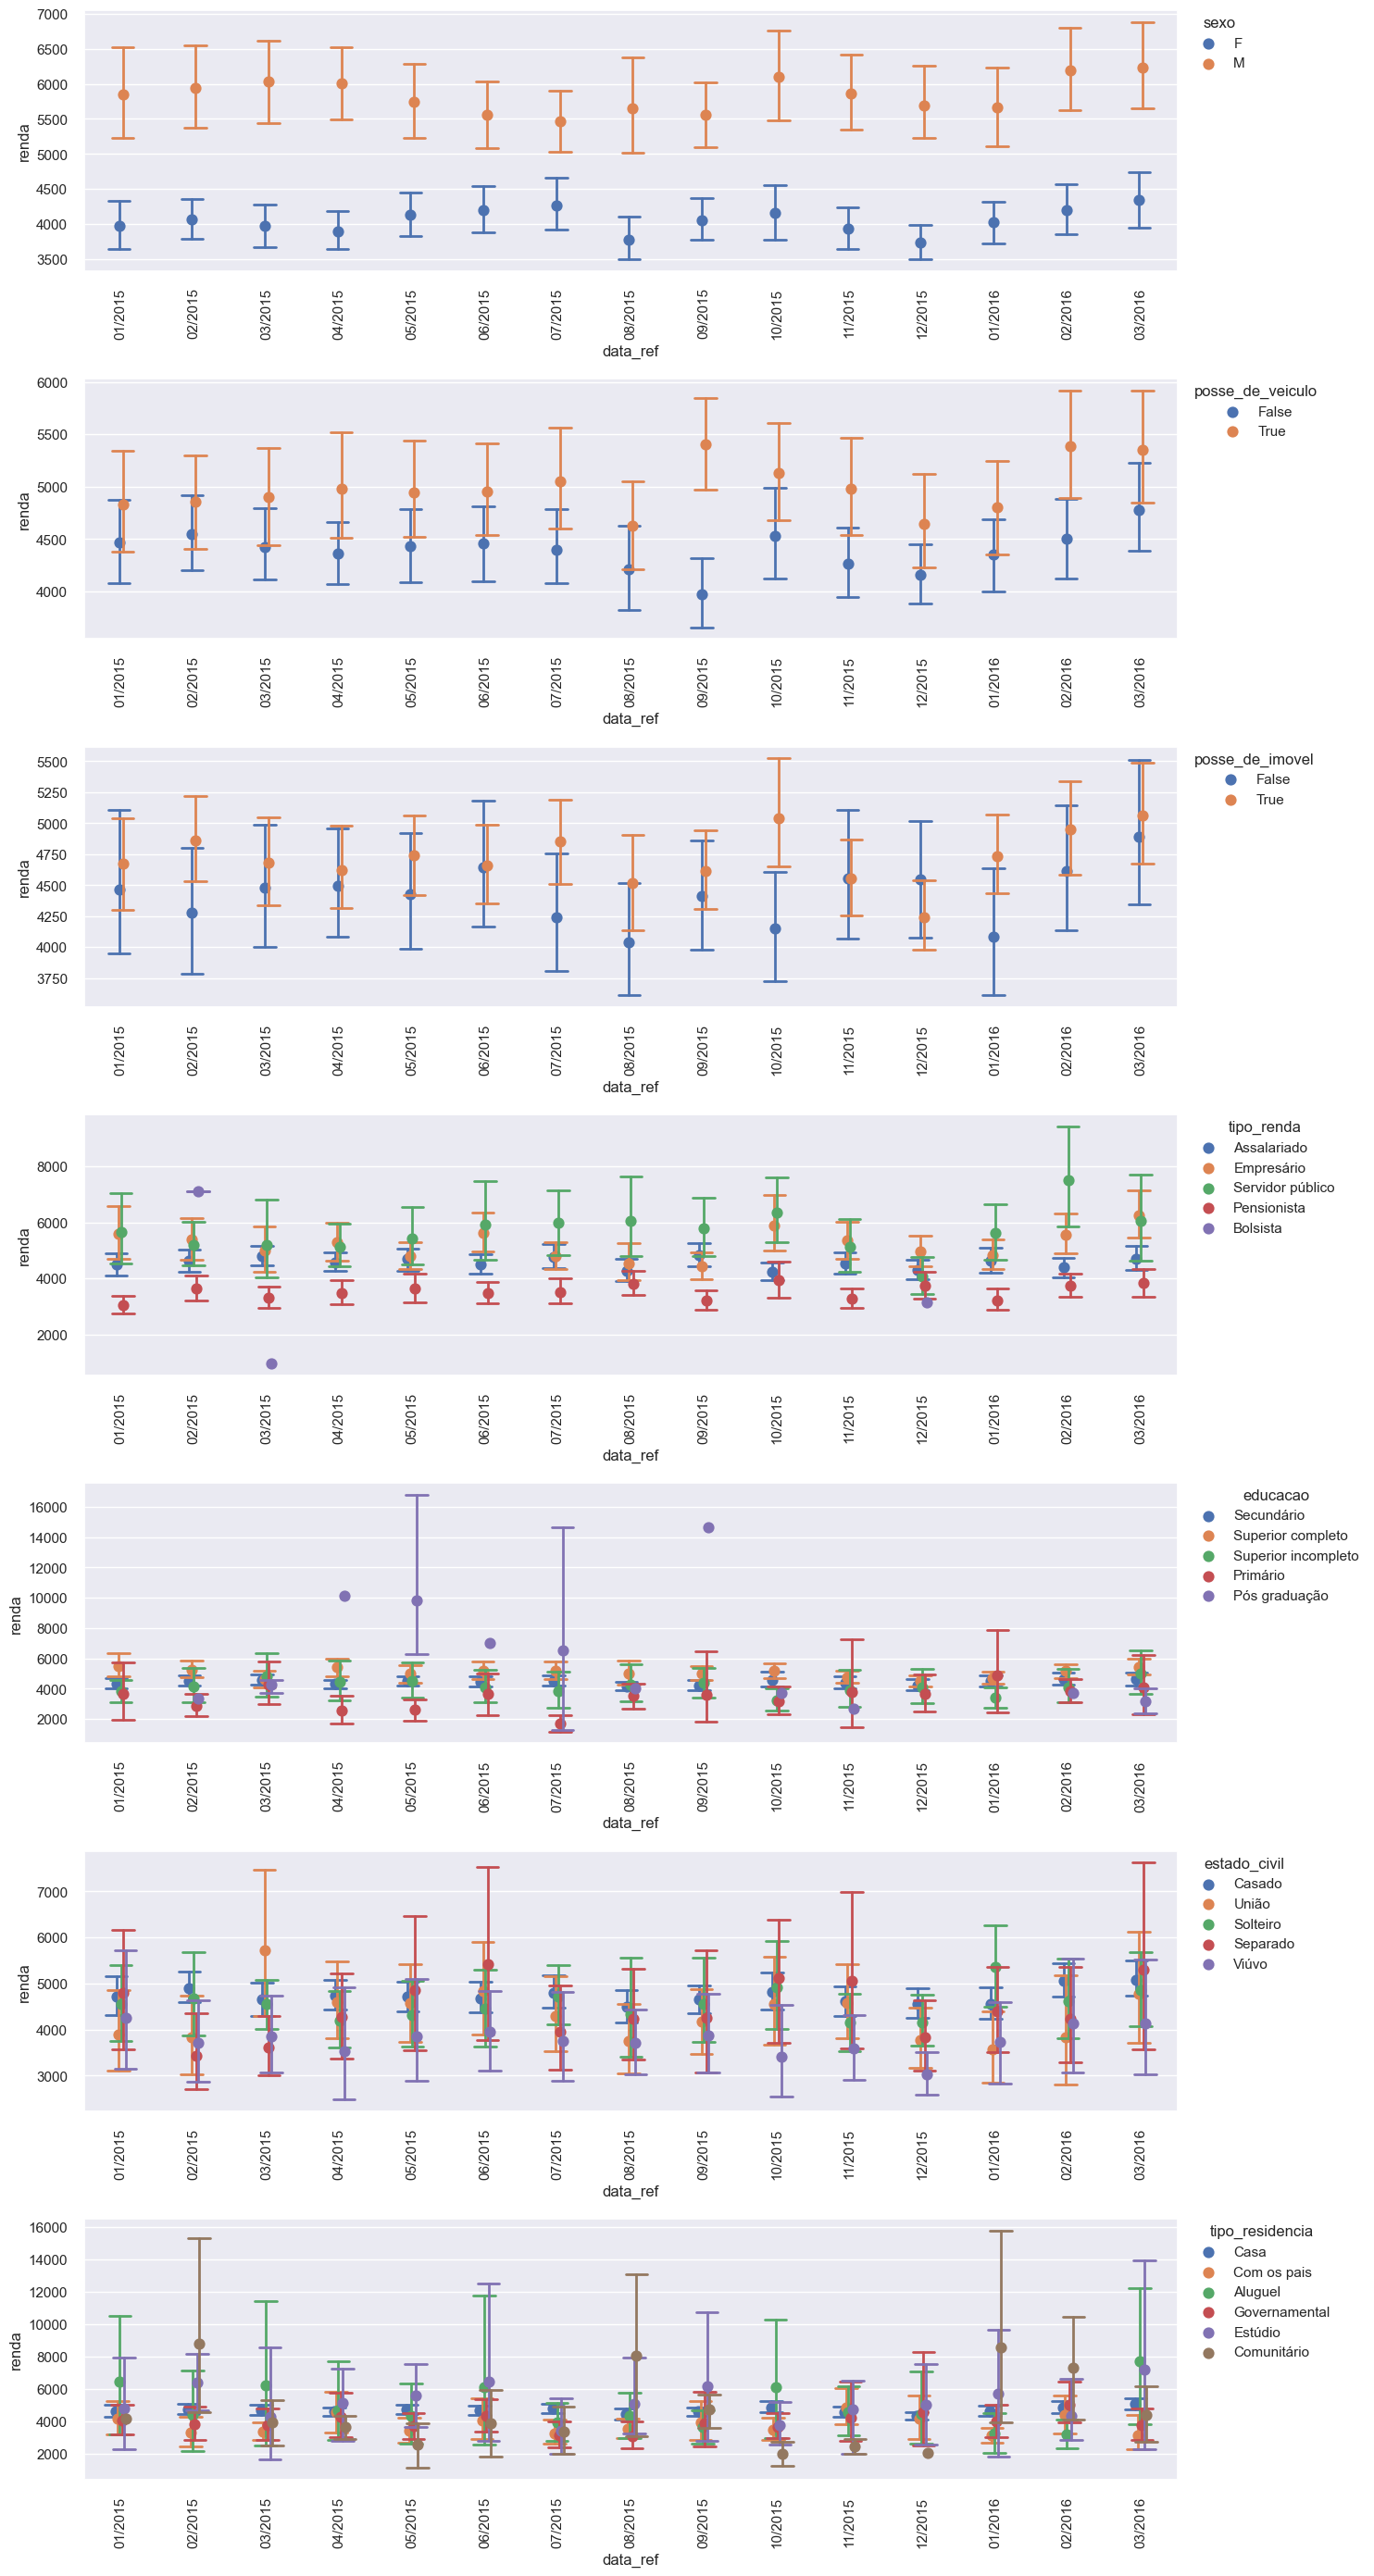

In [76]:
fig, ax = plt.subplots(len(list_var), 1, figsize=(15,4*len(list_var)))
tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m/%Y")).unique()

for i, var in enumerate(list_var):
    axg = ax[i]

    #plot Graph
    sns.pointplot(x='data_ref', 
                  y="renda", 
                  hue=var, 
                  data=df,
                  dodge=True,
                  errorbar = ('ci', 95),
                  capsize=.3,
                  join=False,
                  errwidth=2,
                  ax=axg
    )

    #Axis config
    axg.set_xticklabels(tick_labs,rotation=90)
    
    axg.legend(title=var, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)

#other configs
plt.tight_layout()

<div style="background: #EEEEF4; padding: 15px 20px; border-radius: 5px; margin-top: 20px">
    <p style="font-size: 11px; color: #666; font-weight: bold">Resposta</p>
    <p>Ao Analisar a renda média por categoria ao longo do tempo vemos um comportamento estranho nas variáveis educacao (categoria Pós Graduação), Tipo de renda (categoria Bolsista) e Posse de Veículo (categoria True em 09/2015)</p>
    <p>É importante observar essas variáveis e verificar se são outliers ou realmente uma mudança valida que deve ser considerada na modelagem</p>
</div>